# Analysis of the Semiconductor Crisis Impact

This project aims to analyze the impact of the semiconductor crisis on the stock prices of companies heavily dependent on them, in order to understand the broader market consequences. The analysis will focus on:

1. **Stock Prices**: Analyze how the stock prices of these companies were affected during the crisis (2019-2022), comparing them to the pre-crisis period (2016-2019) and the post-crisis period (2022 onwards).
2. **Resilience**: Identify which companies were able to sustain themselves and recover better in recent years, and evaluate the overall impact on the stock prices of these companies.
3. **Trading Volumes**: Measure investor interest during critical periods and assess the strategies adopted to make a problematic situation profitable for multiple sectors.

To analyze various sectors, the analysis will focus on 5 main companies:
- APPLE
- TESLA
- NVIDIA
- TSM
- INTEL

The first three are heavily dependent on semiconductors, while the latter two are leaders in the semiconductor production market.

**Interesting Point**: To reduce dependency on foreign companies in the semiconductor market, the United States, through the CHIPS Act, invested approximately $8 billion (2024) in Intel to produce chips domestically, avoiding imports from companies like TSMC. Although this goal has not been fully achieved, it is interesting to analyze the behavior of these companies in the markets to understand how national policies impact the stock market.



In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

companies = {
    "TSMC": "TSM",  
    "Apple": "AAPL",  
    "Tesla": "TSLA",  
    "NVIDIA": "NVDA",
    "Intel": "INTC"
}

base_url = "https://financialmodelingprep.com/api/v3/historical-price-full/"
api_key = "79cc96e2b0ac1afdd43138fc093b7bde" #API

for company, symbol in companies.items():
    url = f"{base_url}{symbol}?serietype=line&apikey={api_key}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        
        with open(f"{symbol}.json", "w") as json_file:
            json.dump(data, json_file, indent=4)
        print(f"Dati salvati per {company} ({symbol})")
    else:
        print(f"Errore nel recupero dei dati per {company} ({symbol}): {response.status_code}")

stock_data = []

for company, symbol in companies.items():
    file_name = f"{symbol}.json"
    

    with open(file_name, "r") as json_file:
        data = json.load(json_file)
            
        
        if "historical" in data:
            for record in data["historical"]:
                record["symbol"] = symbol  
                
                record["volume"] = record.get("volume", 0)  
                stock_data.append(record)

#DataFrame
df = pd.DataFrame(stock_data)
df.to_csv("semiconductors_data.csv", index=False)

Dati salvati per TSMC (TSM)
Dati salvati per Apple (AAPL)
Dati salvati per Tesla (TSLA)
Dati salvati per NVIDIA (NVDA)
Dati salvati per Intel (INTC)


# Time Series Analysis

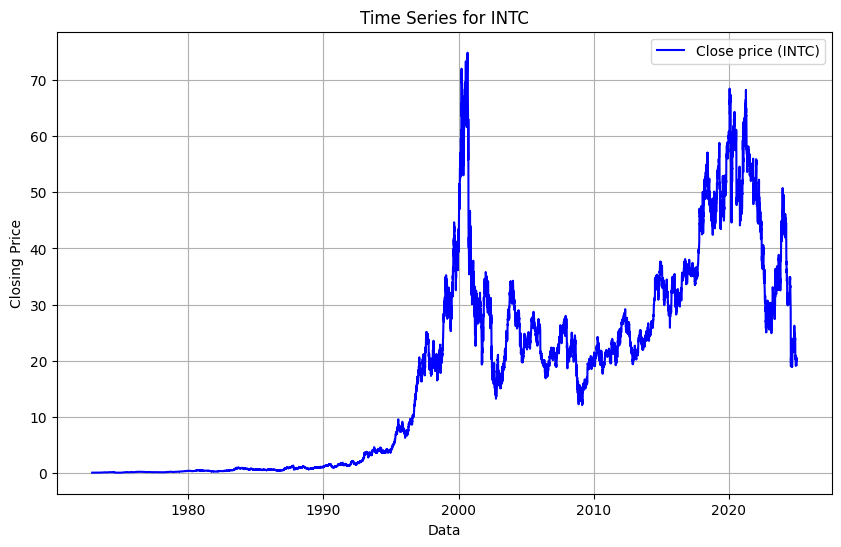

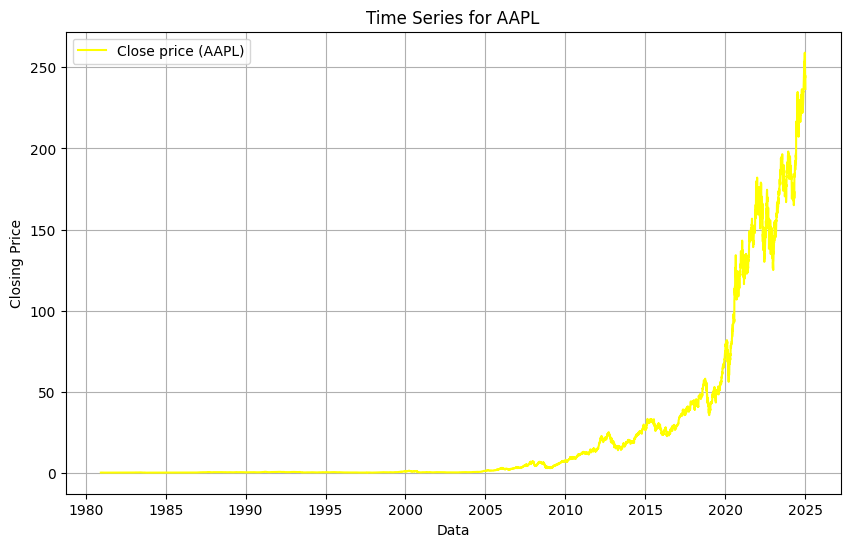

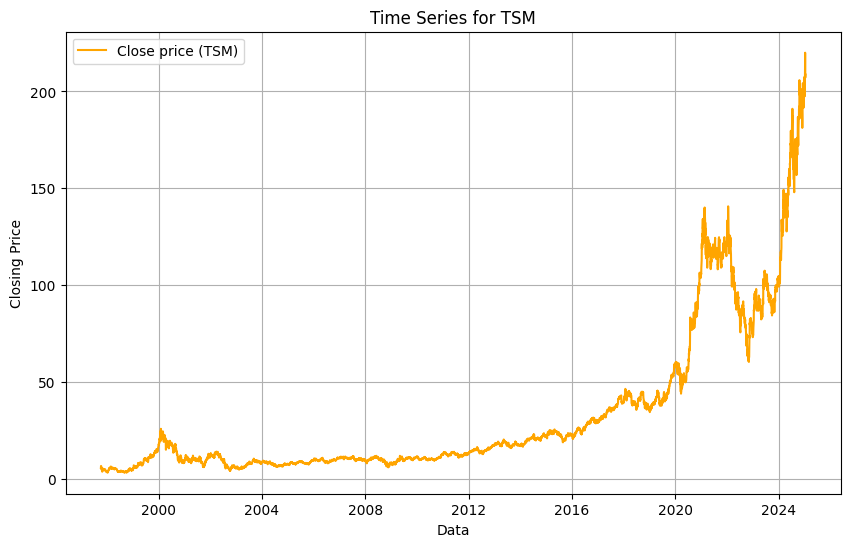

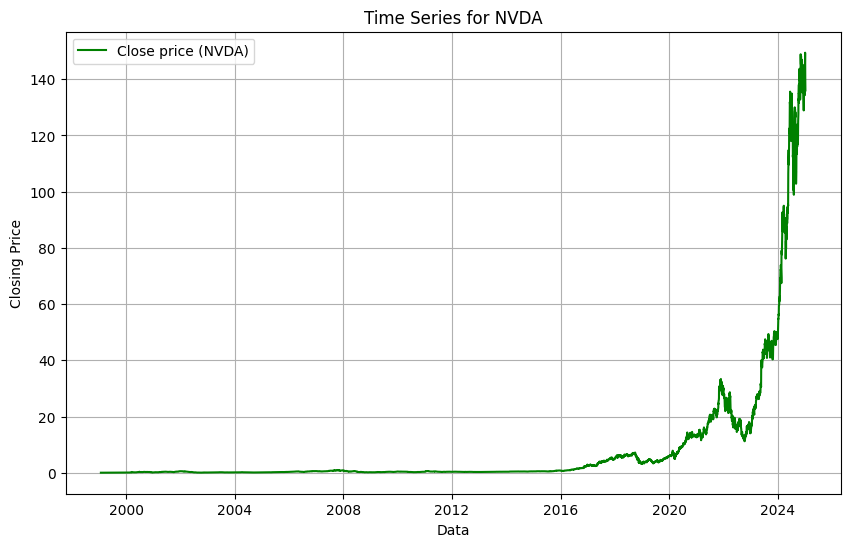

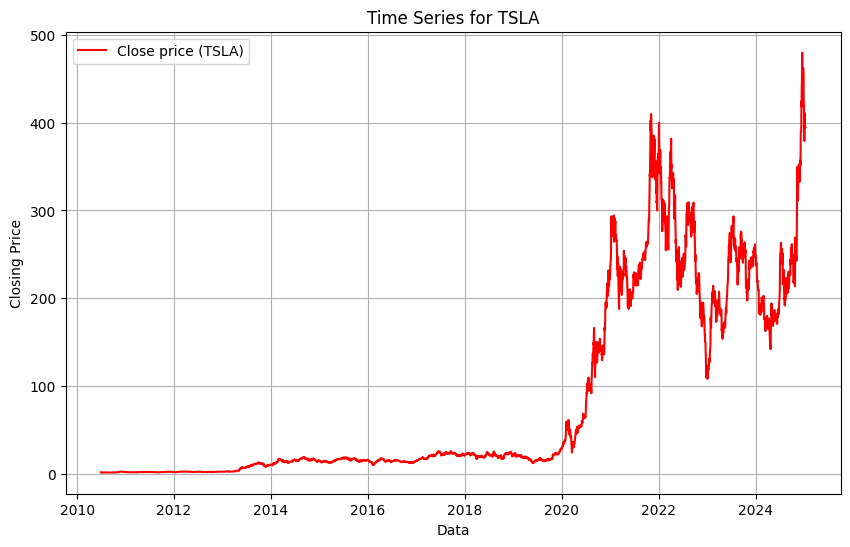

In [2]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(by="date")

colors = {
    "TSM": "orange",
    "AAPL": "yellow",
    "TSLA": "red",
    "NVDA": "green",
    "INTC": "blue"
        }
for symbol in df["symbol"].unique():
    symbol_data = df[df["symbol"] == symbol]       

    # Close price plot
    plt.figure(figsize=(10, 6))
    plt.plot(symbol_data["date"], symbol_data["close"], label=f"Close price ({symbol})", color=colors[symbol])
    plt.title(f"Time Series for {symbol}")
    plt.xlabel("Data")
    plt.ylabel("Closing Price")
    plt.legend()
    plt.grid(True)
    plt.show()

**OBSERVATIONS**:  
The general time series already reveal price fluctuations during the peak of the crisis, but they also show how most companies (except Intel) managed to overcome the crisis brilliantly. This can be inferred from the upward trends, which are possibly a result of increased investor confidence in the market.  
To better understand the price fluctuations, I chose to split the periods into pre-crisis, during the crisis, and post-crisis phases.

# Stock price study during the pre-crisis, crisis and post crisis periods.

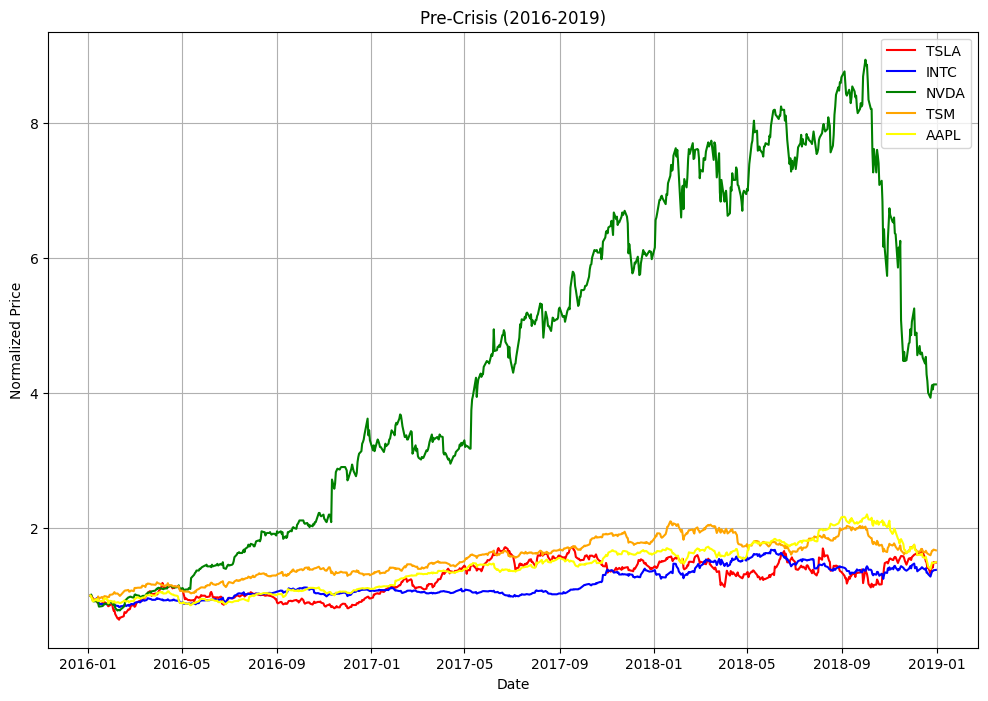

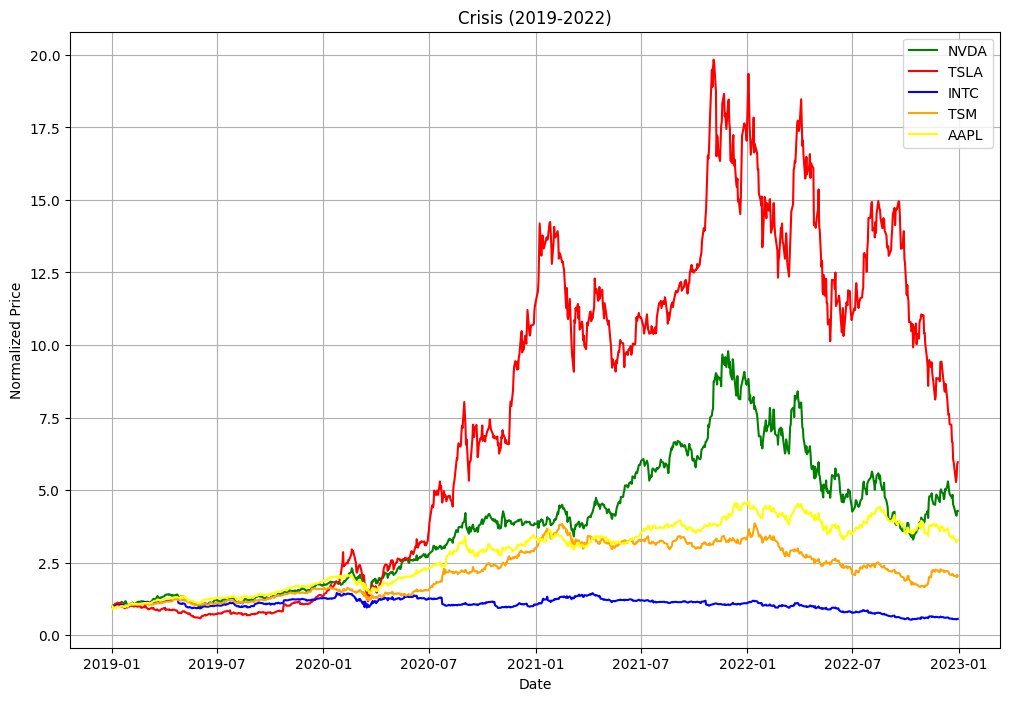

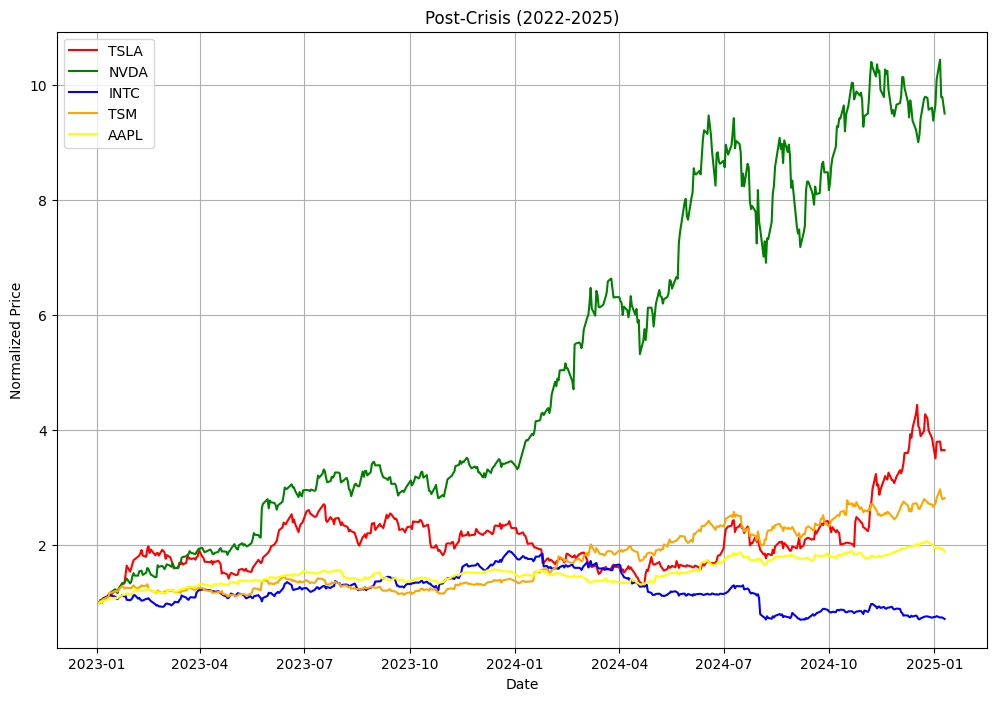

In [5]:
#See the Year
period_1 = df[(df["date"] >= "2016-01-01") & (df["date"] < "2019-01-01")]
period_2 = df[(df["date"] >= "2019-01-01") & (df["date"] <= "2022-12-31")]
period_3 = df[df["date"] > "2022-12-31"]

def normalize_prices(data):
    data = data.copy()
    data["normalized_close"] = data.groupby("symbol")["close"].transform(lambda x: x / x.iloc[0])
    return data

period_1_normalized = normalize_prices(period_1)
period_2_normalized = normalize_prices(period_2)
period_3_normalized = normalize_prices(period_3)


def plot_period(data, title):
    plt.figure(figsize=(12, 8))
    for symbol in data["symbol"].unique():
        company_data = data[data["symbol"] == symbol]
        plt.plot(company_data["date"], company_data["normalized_close"], label=f"{symbol}", color=colors[symbol])
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Normalized Price")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_period(period_1_normalized, "Pre-Crisis (2016-2019)")
plot_period(period_2_normalized, "Crisis (2019-2022)")
plot_period(period_3_normalized, "Post-Crisis (2022-2025)")


**KEY POINTS**: The key insight here is: during the crisis, all companies (except Intel) experienced an upward trend (see Tesla, which grew 8x from 01-2019). However, as the crisis intensified (late 2022-2023), all companies faced a significant retracement. Following the crisis, only NVIDIA managed to return to its pre-crisis trend. Intel, despite being heavily funded by the government, failed to gain the trust of investors, which TSMC, on the other hand, achieved. Apple remains the least fluctuating company; the brand's reputation prevented any loss of investor confidence, as they continued to value the asset consistently.

**FUN FACT**: Tesla experienced remarkable success during those years for several reasons:
- The personal brand of Elon Musk, which had gained significant prominence in those years, especially following the purchase of Twitter (now X).
- Strong support from crypto investors, as Tesla implemented cryptocurrency payments, albeit briefly (03-2021 to 05-2021), as seen in the chart where prices fluctuate.
- The transition from ICE vehicles to EVs, during which Tesla was a pioneer in the market.
- The FOMO (Fear of Missing Out) among investors who didn’t want to miss out on a globally discussed project.



# Volatility Analisys

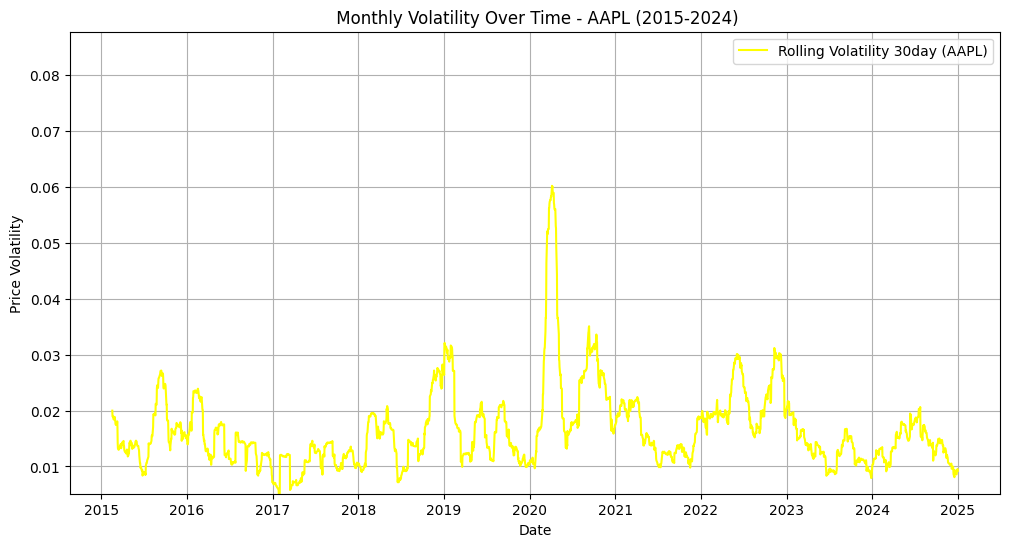

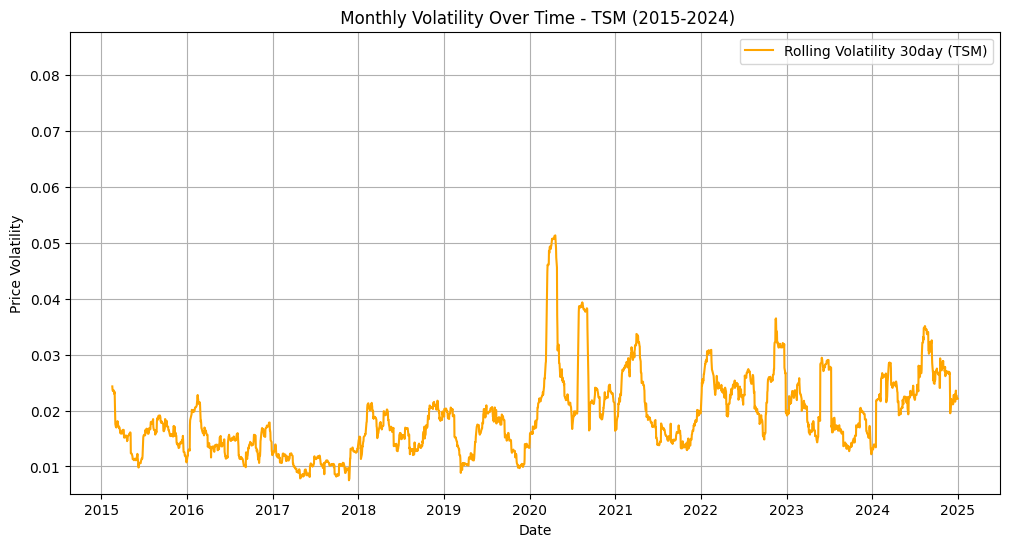

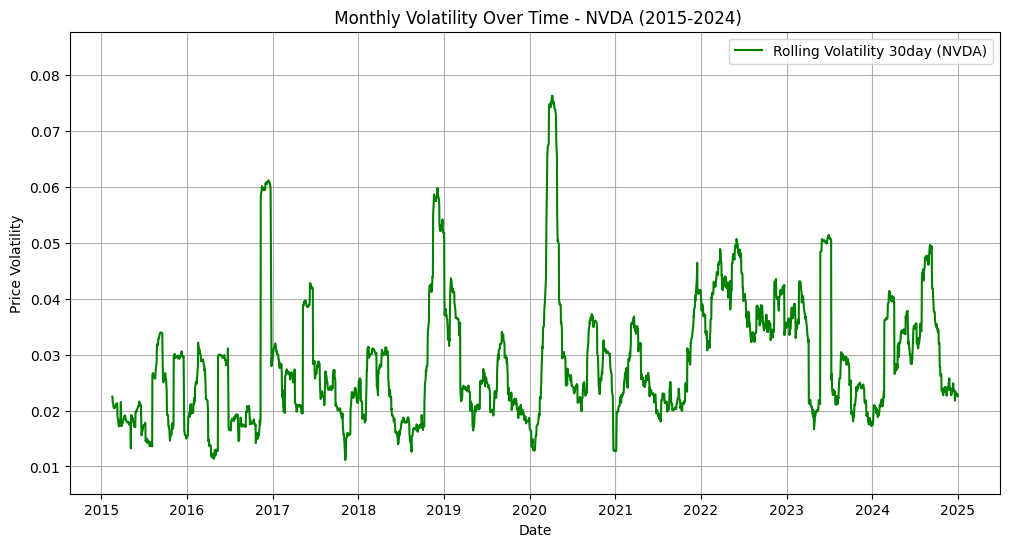

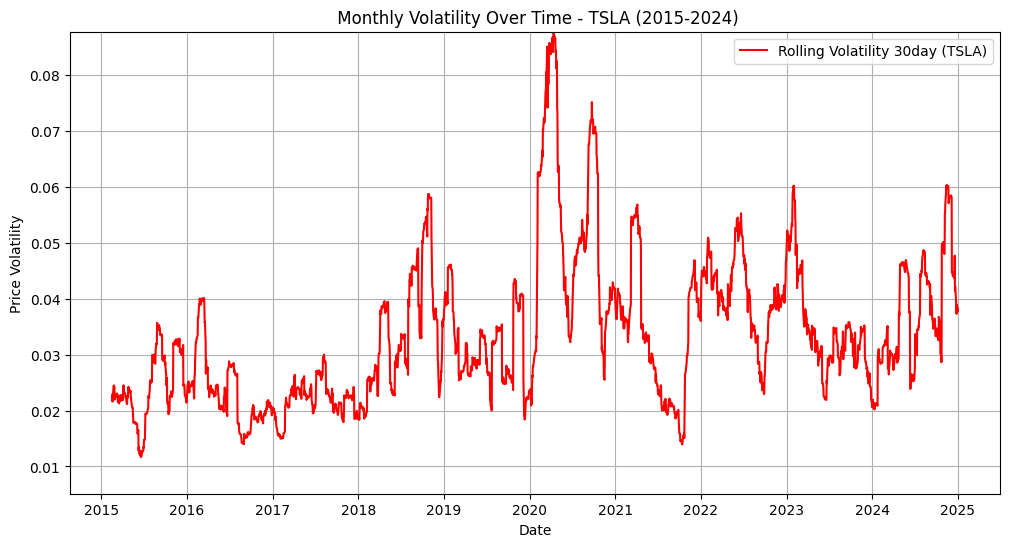

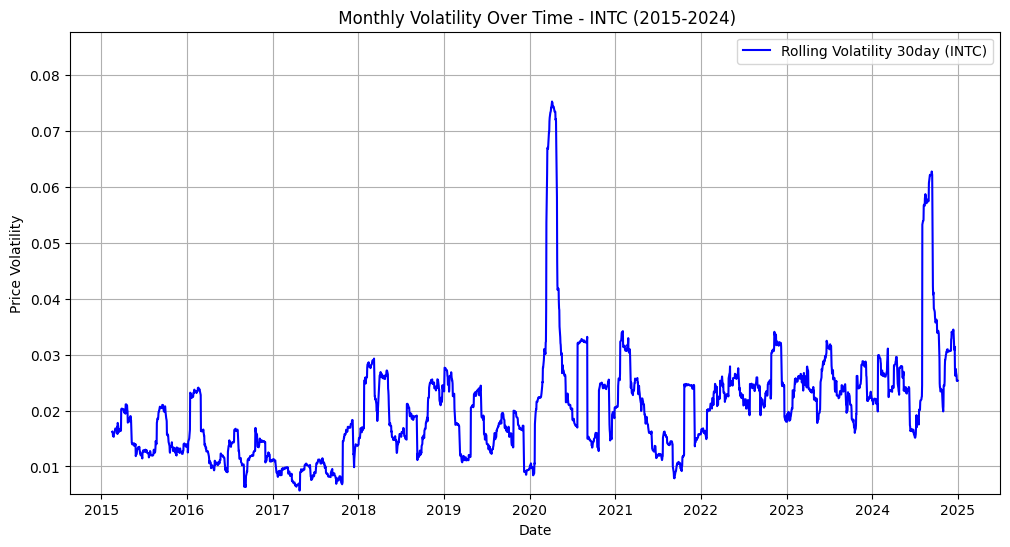

In [6]:
df = df[(df["date"] >= "2015-01-01") & (df["date"] <= "2024-12-31")]

#Volatility e daily return (serivrà anche dopo) 
df["daily_return"] = df.groupby("symbol")["close"].pct_change()
df["rolling_volatility"] = df.groupby("symbol")["daily_return"].rolling(window=30).std().reset_index(0, drop=True)

volatility_min = df["rolling_volatility"].min()
volatility_max = df["rolling_volatility"].max()

#PLOT
for symbol in df["symbol"].unique():
    company_data = df[df["symbol"] == symbol]

    plt.figure(figsize=(12, 6))

    plt.plot(company_data["date"], company_data["rolling_volatility"], label=f"Rolling Volatility 30day ({symbol})", color=colors[symbol])
    plt.ylim(volatility_min, volatility_max)

    plt.title(f" Monthly Volatility Over Time - {symbol} (2015-2024)")
    plt.xlabel("Date")
    plt.ylabel("Price Volatility")
    plt.legend()
    plt.grid(True)
    plt.show()

**Interpretation of Volatility**  
The charts reveal a general trend of peaks in 2020. Companies like Tesla, Intel, and NVIDIA experienced significant spikes in volatility during the crisis, clearly reflecting market uncertainty. The COVID pandemic, as an additional source of uncertainty, undoubtedly contributed to making the market more unstable and volatile than it already was. Post-crisis, all companies returned to the same level of volatility they had pre-crisis. However, in the last year, Intel, Tesla, and NVIDIA have shown renewed oscillations in volatility, while Apple has remained the most stable, even in terms of volatility, despite Berkshire Hathaway selling approximately 500 million Apple shares in 2024.





# Daily Return Correlation Matrix

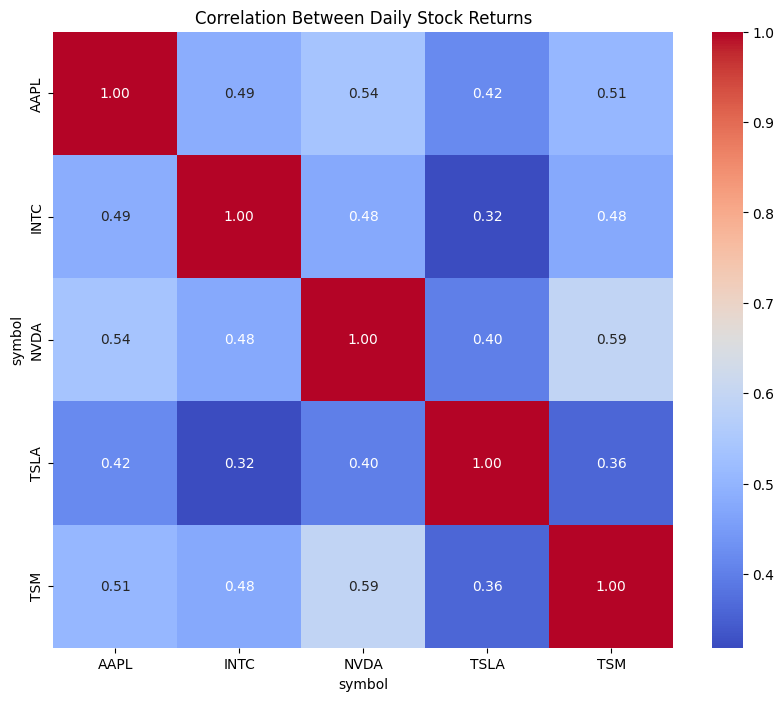

In [7]:
df["daily_return"] = df.groupby("symbol")["close"].pct_change()

returns_df = df.pivot(index="date", columns="symbol", values="daily_return")

correlation_matrix = returns_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Between Daily Stock Returns")
plt.show()

**OBSERVATIONS**: The correlation matrix shows positive correlations among all the companies, proving that, despite belonging to different sectors, their dependence on chips (both as a raw material and as a product they provide) is significant. The highest correlations include:
- **NVIDIA and TSM** with 0.59: NVIDIA depends on TSMC because the majority of the semiconductors it uses are supplied by TSMC.
- **Apple** stands out as a company with a large market share in the index. Therefore, if Apple underperforms, other companies in the index could experience a ripple effect.

It seems that market sentiment also reflects the strong dependence of the entire American market on Apple.


# Bearish and Bullish Trends

trend   Bearish  Bullish  Neutral
symbol                           
AAPL         16       16      976
INTC         24       18      966
NVDA         56       74      878
TSLA         83       94      831
TSM          17       26      965


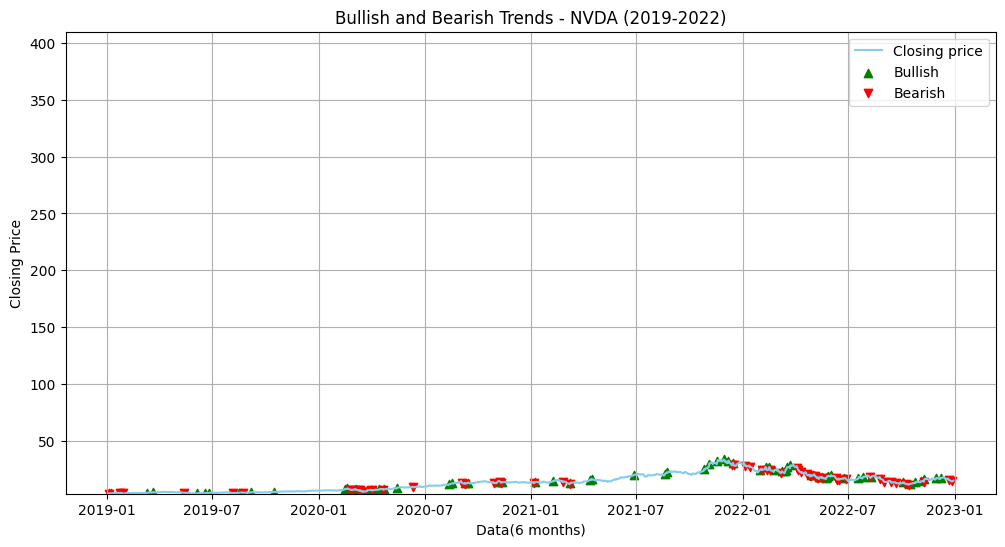

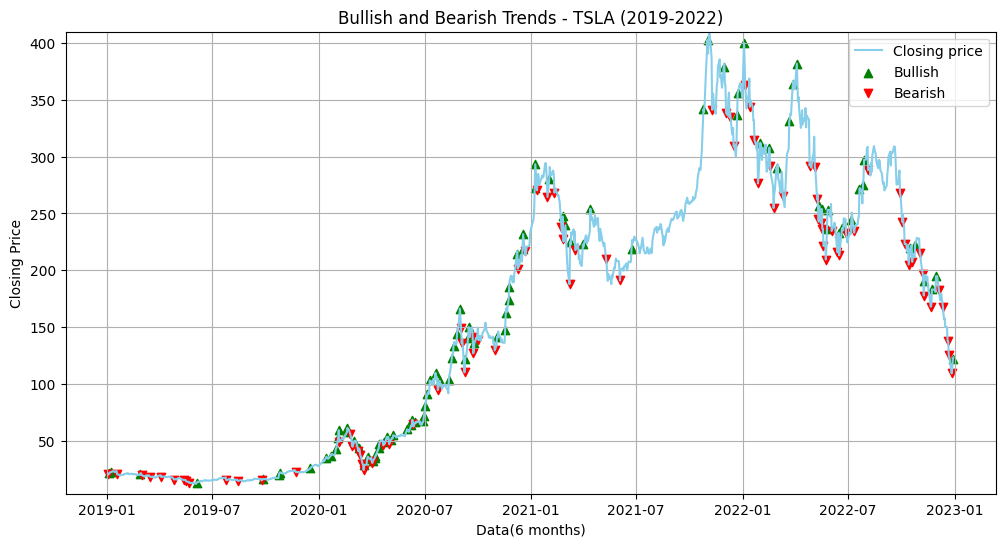

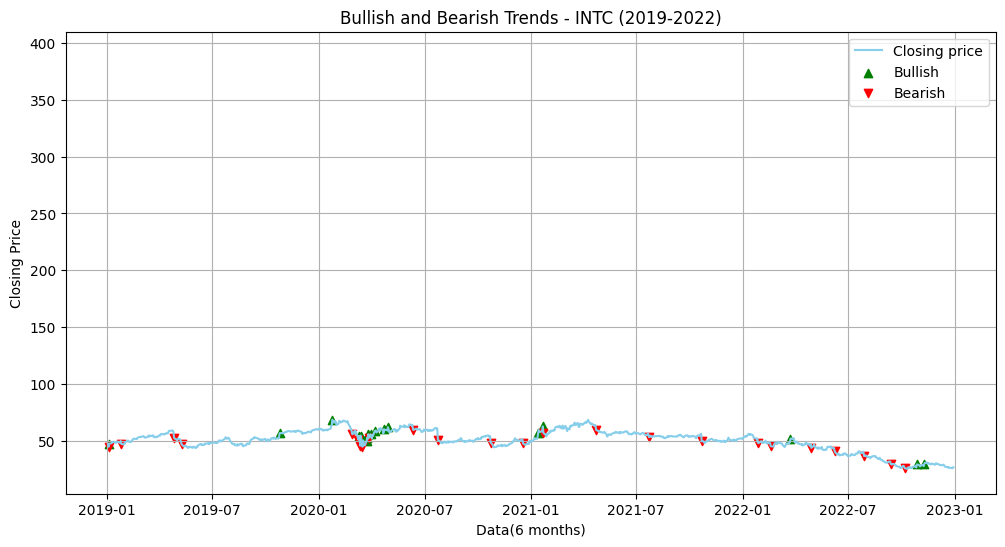

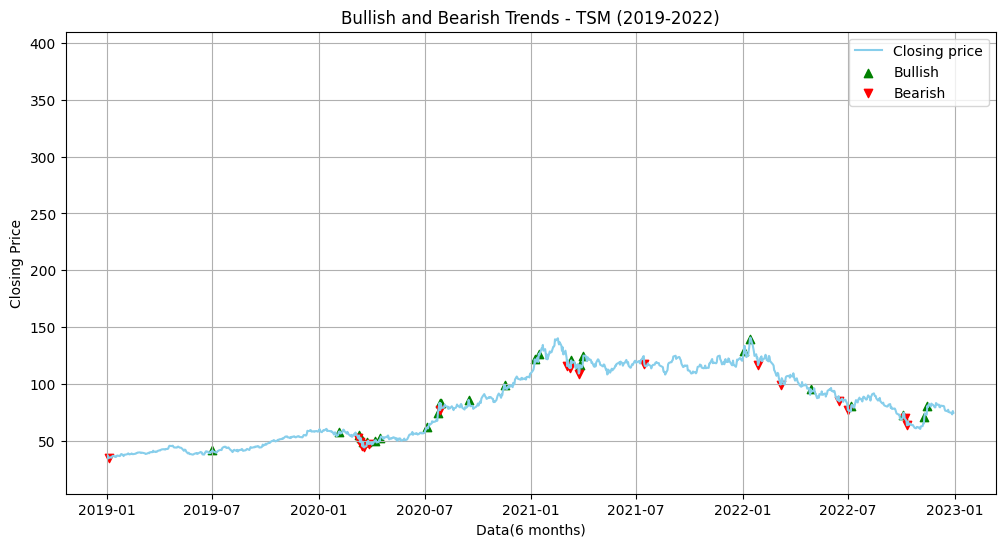

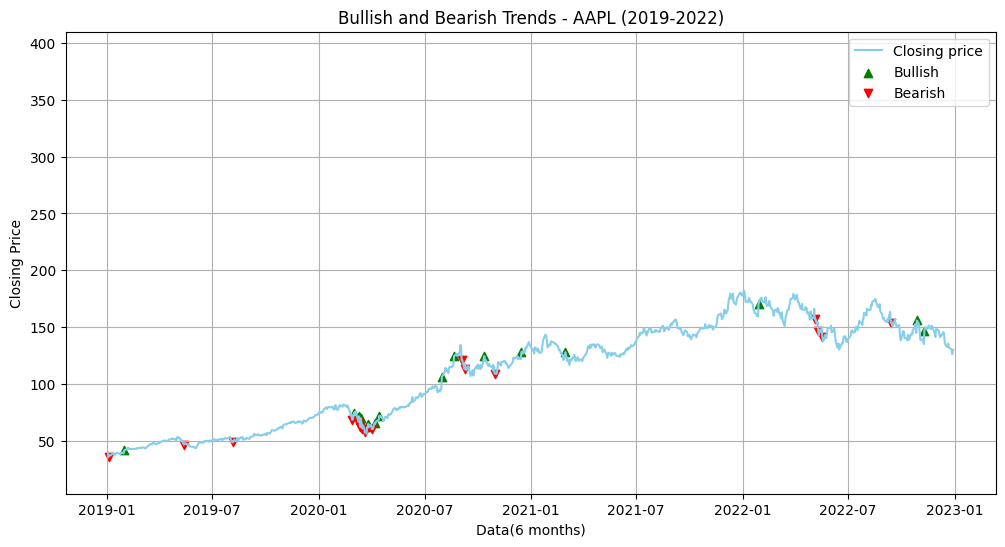

In [11]:
df = df[(df["date"] >= "2019-01-01") & (df["date"] <= "2022-12-31")]

# Threshold 
bullish_threshold = 0.05 
bearish_threshold = -0.05 

#Day trend
df["trend"] = "Neutral"
df.loc[df["daily_return"] > bullish_threshold, "trend"] = "Bullish"
df.loc[df["daily_return"] < bearish_threshold, "trend"] = "Bearish"

trend_counts = df.groupby(["symbol", "trend"]).size().unstack(fill_value=0)
print(trend_counts)

y_min = df["close"].min()
y_max = df["close"].max()

for symbol in df["symbol"].unique():
    company_data = df[df["symbol"] == symbol]

    plt.figure(figsize=(12, 6))

    plt.plot(company_data["date"], company_data["close"], label="Closing price", color="SkyBlue")

    bullish_days = company_data[company_data["trend"] == "Bullish"]
    bearish_days = company_data[company_data["trend"] == "Bearish"]
        
    plt.scatter(bullish_days["date"], bullish_days["close"], color="green", label="Bullish", marker="^")
    plt.scatter(bearish_days["date"], bearish_days["close"], color="red", label="Bearish", marker="v")

    plt.title(f"Bullish and Bearish Trends - {symbol} (2019-2022)")
    plt.xlabel("Data(6 months)")
    plt.ylabel("Closing Price")
    plt.ylim(y_min, y_max)
    plt.legend()
    plt.grid(True)
    plt.show()

# Bullish and Bearish Analysis and Final Interpretation

Based on the charts and the count data, we can observe the following:

- **APPLE**: Apple remains the least affected by the crisis, showing a completely neutral trend across all three years, demonstrating considerable resilience.

- **TSMC**: Despite being at the center of the crisis, TSMC maintained a neutral trend similar to Apple and managed to retain investor confidence. In fact, the chart shows an upward trend from 2021-01 to 2022-01, indicating that investors viewed TSMC as an opportunity rather than a challenge.

- **TESLA**: Tesla has the highest number of Bearish and Bullish days and is the only company among the five to experience a significant surge during the crisis (see the fun fact), followed by a substantial retracement. Nevertheless, Tesla can still be considered resilient and less impacted by the crisis.

- **NVIDIA**: NVIDIA managed to overcome the crisis despite being heavily dependent on it. Its behavior closely mirrors that of TSMC (with a 0.69 correlation), showcasing strong resilience.

- **Intel**: Despite massive government investments through the CHIPS Act, Intel struggled to fully capitalize on these opportunities. It exhibited a medium-low trend and failed to close the technological gap with TSMC.
